In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
import tensorflow.keras as keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
import keras

(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert class vectors to binary class matrices.
Y_train = keras.utils.to_categorical(Y_train_orig, 10)
Y_test = keras.utils.to_categorical(Y_test_orig, 10)    

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'CNN_cifar10_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [4]:
from cifar10_net import CNN20
model1 = CNN20(input_shape = (32, 32, 3), classes = 10)
model1.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model1.summary()

Learning rate:  0.001
Model: "ResNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2_1_conv2d_1 (Conv2D)    (None, 32, 32, 16)        448       
_________________________________________________________________
conv2_1_bn_1 (BatchNormaliza (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2_1_conv2d_2 (Conv2D)    (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2_1_bn_2 (BatchNormaliza (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    data_format=None,
    validation_split = 0.0)

In [6]:
history1 = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              epochs = 100, 
                              validation_data=(X_test, Y_test),
                              callbacks=[scheduler, checkpoint])

Learning rate:  0.001
Epoch 1/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.6477 - accuracy: 0.3843
Epoch 00001: val_accuracy improved from -inf to 0.36420, saving model to C:\Users\Wender\Notebook\proj\saved_models\CNN_20_model.h5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6476 - accuracy: 0.3843 - val_loss: 1.9260 - val_accuracy: 0.3642
Learning rate:  0.001
Epoch 2/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.2828 - accuracy: 0.5339
Epoch 00002: val_accuracy improved from 0.36420 to 0.48900, saving model to C:\Users\Wender\Notebook\proj\saved_models\CNN_20_model.h5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.2826 - accuracy: 0.5340 - val_loss: 1.5606 - val_accuracy: 0.4890
Learning rate:  0.001
Epoch 3/100
1562/1563 [============================>.] - ETA: 0s - loss: 1.0292 - accuracy: 0.6357
Epoch 00003: val_accuracy improved from 0.48900 to 0.63750, saving model to C:\Users\Wender\Notebo

Learning rate:  0.001
Epoch 25/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8693
Epoch 00025: val_accuracy improved from 0.82960 to 0.84890, saving model to C:\Users\Wender\Notebook\proj\saved_models\CNN_20_model.h5
1563/1563 [==============================] - 114s 73ms/step - loss: 0.3754 - accuracy: 0.8693 - val_loss: 0.4657 - val_accuracy: 0.8489
Learning rate:  0.001
Epoch 26/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.3670 - accuracy: 0.8739
Epoch 00026: val_accuracy did not improve from 0.84890
1563/1563 [==============================] - 115s 73ms/step - loss: 0.3671 - accuracy: 0.8739 - val_loss: 0.5876 - val_accuracy: 0.8132
Learning rate:  0.001
Epoch 27/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.3588 - accuracy: 0.8748
Epoch 00027: val_accuracy did not improve from 0.84890
1563/1563 [==============================] - 114s 73ms/step - loss: 0.3587 - accuracy: 0.8748 - val_loss: 0.4925 - va

Learning rate:  0.001
Epoch 50/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9113
Epoch 00050: val_accuracy did not improve from 0.86370
1563/1563 [==============================] - 114s 73ms/step - loss: 0.2468 - accuracy: 0.9113 - val_loss: 0.4498 - val_accuracy: 0.8585
Learning rate:  0.001
Epoch 51/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.9134
Epoch 00051: val_accuracy did not improve from 0.86370
1563/1563 [==============================] - 115s 73ms/step - loss: 0.2433 - accuracy: 0.9134 - val_loss: 0.4581 - val_accuracy: 0.8599
Learning rate:  0.001
Epoch 52/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.9155
Epoch 00052: val_accuracy did not improve from 0.86370
1563/1563 [==============================] - 116s 74ms/step - loss: 0.2416 - accuracy: 0.9155 - val_loss: 0.5201 - val_accuracy: 0.8422
Learning rate:  0.001
Epoch 53/100
1562/1563 [===============

Learning rate:  0.001
Epoch 76/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9371
Epoch 00076: val_accuracy did not improve from 0.87540
1563/1563 [==============================] - 116s 74ms/step - loss: 0.1769 - accuracy: 0.9371 - val_loss: 0.4325 - val_accuracy: 0.8684
Learning rate:  0.001
Epoch 77/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9356
Epoch 00077: val_accuracy did not improve from 0.87540
1563/1563 [==============================] - 115s 73ms/step - loss: 0.1792 - accuracy: 0.9356 - val_loss: 0.4835 - val_accuracy: 0.8593
Learning rate:  0.001
Epoch 78/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.1784 - accuracy: 0.9373
Epoch 00078: val_accuracy did not improve from 0.87540
1563/1563 [==============================] - 115s 74ms/step - loss: 0.1785 - accuracy: 0.9372 - val_loss: 0.5623 - val_accuracy: 0.8409
Learning rate:  0.001
Epoch 79/100
1562/1563 [===============

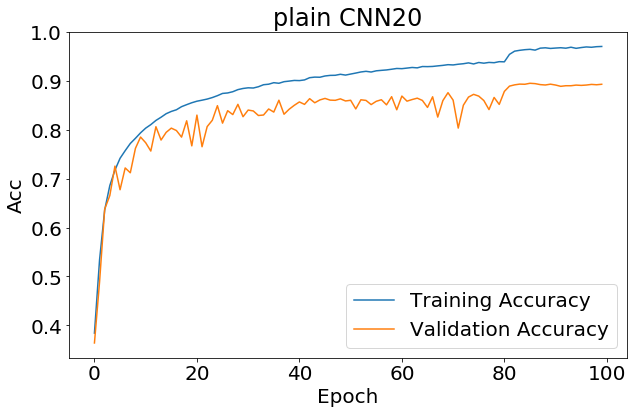

In [8]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(acc1, label='Training Accuracy')
ax1.plot(val_acc1, label='Validation Accuracy')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'Acc', fontsize=20)
ax1.set_title('plain CNN20', fontsize=24)

ax1.tick_params(labelsize=20)

ax1.legend(loc=4, fontsize=20)

plt.show()